# Predicting Wine Quality

### Introduction

For thousands of years, high quality wine-making was an art that demanded recipes and techniques passed down from generations to generations through trial and error. In the past century, rapid scientific advancement has changed the wine-making process through its discovery on how certain ingredients contribute to important chemical reactions in steps like fermentation. Due in part to these advancements, the wine industry has become more complex and competitive and efficiency is more important than ever.

The dataset used in this project is the Red Wine Quality Dataset found on the UCI Machine Learning Repository, containing the quality and physicochemical properties of 1599 red wine samples from the northwest region of Portugal, called *vinho verde* wine. This data was collected from May 2004 to February 2007.

Portugal is the 11th largest producer of wine in the world and its wine industry makes up 10% of its manufacturing companies and 25% of turnover.  In the increasingly global market, wine quality evaluation has become a necessary certification process that stratifies premium and table wines, to name a few. This process provides key insights for manufacturers and economists alike and can measure efficiency for the best production output. A higher quality wine can generate a significantly higher revenue in the increasingly competitive world industry. 

Wine certification characterizes wine based on physicochemical properties (ie. density, pH, and alcohol) and human expert taste testers. The relationship between these two assessments is complex and not well established, since taste is subjective.  

We would like to explore how physicochemical properties alone may influence the quality certification of wine. To do this, we are creating a classification model that predicts the quality of wine from a scale of 3 to 8 using five physicochemical factors: volatile acidity, alcohol, total sulfur dioxide, citric acid, and sulphates. Then, we will analyze its accuracy to determine if these factors alone are influential enough to predict quality. 


## Methods 
First, we installed all necessary packages and libraries needed to carry out our exploration. We loaded our data from the original source on the web using read.csv. Figure 1 summarizes a glimpse of the data table.


In [77]:
install.packages("GGally")
install.packages("corrplot")  
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [83]:
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
library(GGally)       
library(corrplot)
library(cowplot)
library(themis)

In [99]:
winequalityRed <- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
head(winequalityRed)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5


Next, the data was tidied in order to make it viable for analysis. We renamed the columns, replacing the spaces in the names with underscores. Using the as.numeric function, all columns were converted into numeric data types. Since we decided to treat wine quality as a categorical variable, we planned to use as.factor to convert it to a factor data type later on in this project. We needed wine quality to be a numerical data type in order to carry out our exploratory analysis. Figure 2 summarizes our table.

In [80]:
completedt <- winequalityRed |>
              setNames(c("fixed_acidity",
                         "volatile_acidity",
                         "citric_acid",
                         "residual_sugar",
                         "chlorides",
                         "free_SO2",
                         "total_SO2",
                         "density",
                         "pH",
                         "sulphates",
                         "alcohol",
                         "quality",
                         "type"))
completedt$volatile_acidity <- as.numeric(completedt$volatile_acidity)
completedt$citric_acid <- as.numeric(completedt$citric_acid)
completedt$residual_sugar <- as.numeric(completedt$residual_sugar)
completedt$chlorides <- as.numeric(completedt$chlorides)
completedt$density <- as.numeric(completedt$density)
completedt$sulphates <- as.numeric(completedt$sulphates)
head(completedt)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,5


Then, we utilized set.seed for reproducibility and our dataset was split into training and testing sets with wine quality as the stratum. This was done with the function initialsplit. 75% of the data was allocated in the training set using training(), and the remaining 25% in the testing set using testing(). Figure 3 shows part of our training dataset. 


In [81]:
set.seed(100)
wine_split <- initial_split(completedt, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)
head(wine_training)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.880,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
79,0.600,0.06,16,0.069,15,59,0.9964,33,0.46,94,5
75,0.500,0.36,61,0.071,17,102,0.9978,335,0.80,105,5
56,0.615,0.00,16,0.089,16,59,0.9943,358,0.52,99,5



To check the balance of our training dataset, we used the functions group_by and summarize. Here, in Figure 4, we noticed a significant class imbalance. Without intervention, this would significantly affect our model, as K-nearest neighbour classification does not perform well with imbalanced data.


In [82]:
wine_training |> group_by(quality) |> summarize(n=n())

quality,n
<fct>,<int>
3,10
4,40
5,509
6,479
7,147
8,13


To rebalance the data, we oversampled the rare classes using the step_upsample function from the themis R package to our recipe. This replicated rare observations multiple times in our dataset to increase their voting power in the nearest neighbour algorithm. There were more statistically accurate ways to rebalance this data, but they were very much beyond our abilities. Once again using the group_by and summarize functions, we confirmed in Figure 5 that our data had been successfully rebalanced and each quality of wine had an equal amount of observations. 

In [84]:
set.seed(100)
ups_recipe <- recipe(quality ~ ., data = wine_training) |>
  step_upsample(quality, over_ratio = 1, skip = FALSE) |>
  prep()

ups_recipe

wine_training <- bake(ups_recipe, wine_training)

upsampled_wine <- wine_training |> group_by(quality) |> summarize(n=n())
upsampled_wine

Recipe

Inputs:

      role #variables
   outcome          1
 predictor         11

Training data contained 1198 data points and 1 incomplete row. 

Operations:

Up-sampling based on quality [trained]

quality,n
<fct>,<int>
3,509
4,509
5,509
6,509
7,509
8,509


To find potential predictor variables, we decided to generate a correlation matrix (Figure 7) of all variables using the cor function from the corrplot package. To prepare our data, we used mutate to convert the wine quality variable into a numerical data type and filter to remove NA values of the total sulfur dioxide (total_SO2) variable. A snapshot of the cleaned dataset was Figure 6. We had to do this in order for the cor function to run. In each square of the matrix, the correlation coefficient “r” indicated the strength of linear relation. The further the value was from 0, the stronger the relation was. Here, we noticed that the variables sulphates, citric acid, and volatile acidity seemed to have a notable relation with quality in comparison to the other variables. We did not limit ourselves to those predictors; other variables could be non-linearly related to quality.


In [85]:

wine_training_corr <- wine_training|>
                     mutate_at(c('quality'), as.numeric)|>
                     filter(!is.na(total_SO2))
                    
winequalitycorr <-cor(wine_training_corr)

head(round(winequalitycorr,2))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-0.14,0.43,0.06,0.07,-0.11,-0.14,0.43,-0.01,0.18,0.00,0.07
volatile_acidity,-0.14,1.00,-0.63,0.25,0.12,-0.14,-0.13,0.03,-0.13,-0.42,0.01,-0.64
citric_acid,0.43,-0.63,1.00,-0.06,0.19,0.07,0.11,0.35,-0.01,0.50,-0.01,0.46
residual_sugar,0.06,0.25,-0.06,1.00,0.01,-0.02,-0.06,0.09,0.07,-0.04,0.00,-0.12
chlorides,0.07,0.12,0.19,0.01,1.00,0.05,0.05,0.18,-0.06,0.45,0.00,-0.25
free_SO2,-0.11,-0.14,0.07,-0.02,0.05,1.00,0.65,-0.07,0.04,0.09,0.01,0.01


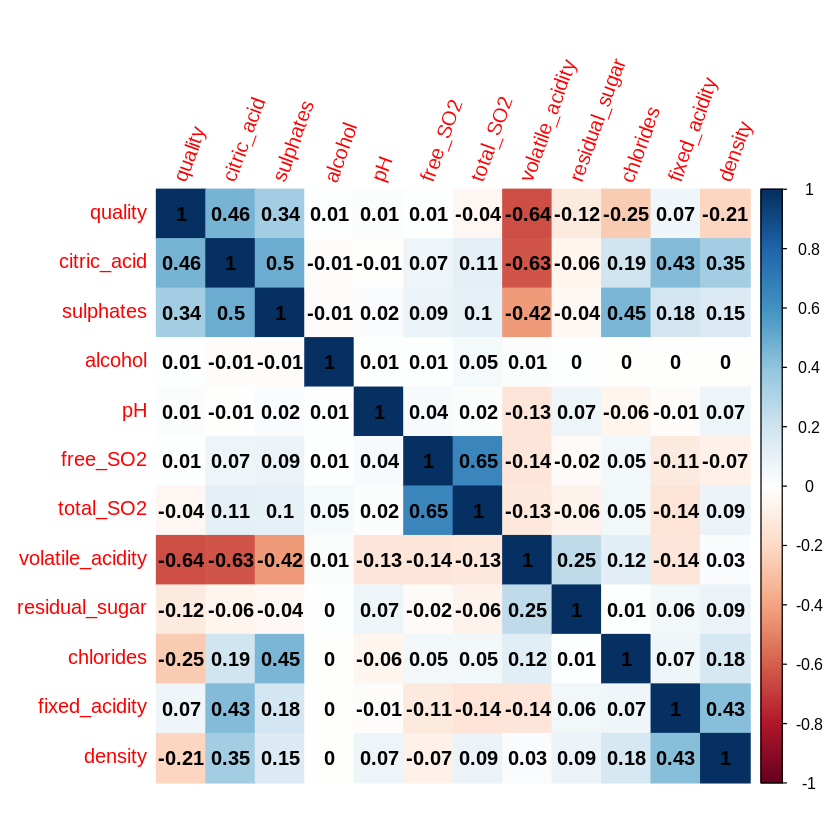

In [10]:
set.seed(100)
corrplot(winequalitycorr, method = 'color', order = 'hclust', addCoef.col = 1,  
       tl.cex = 1, number.cex = 1, tl.srt= 70)

We also used ggpairs to visualize the relationships between all variables, to look for any notable relationships. There was a potential correlation between alcohol and quality observed in Figure 8.


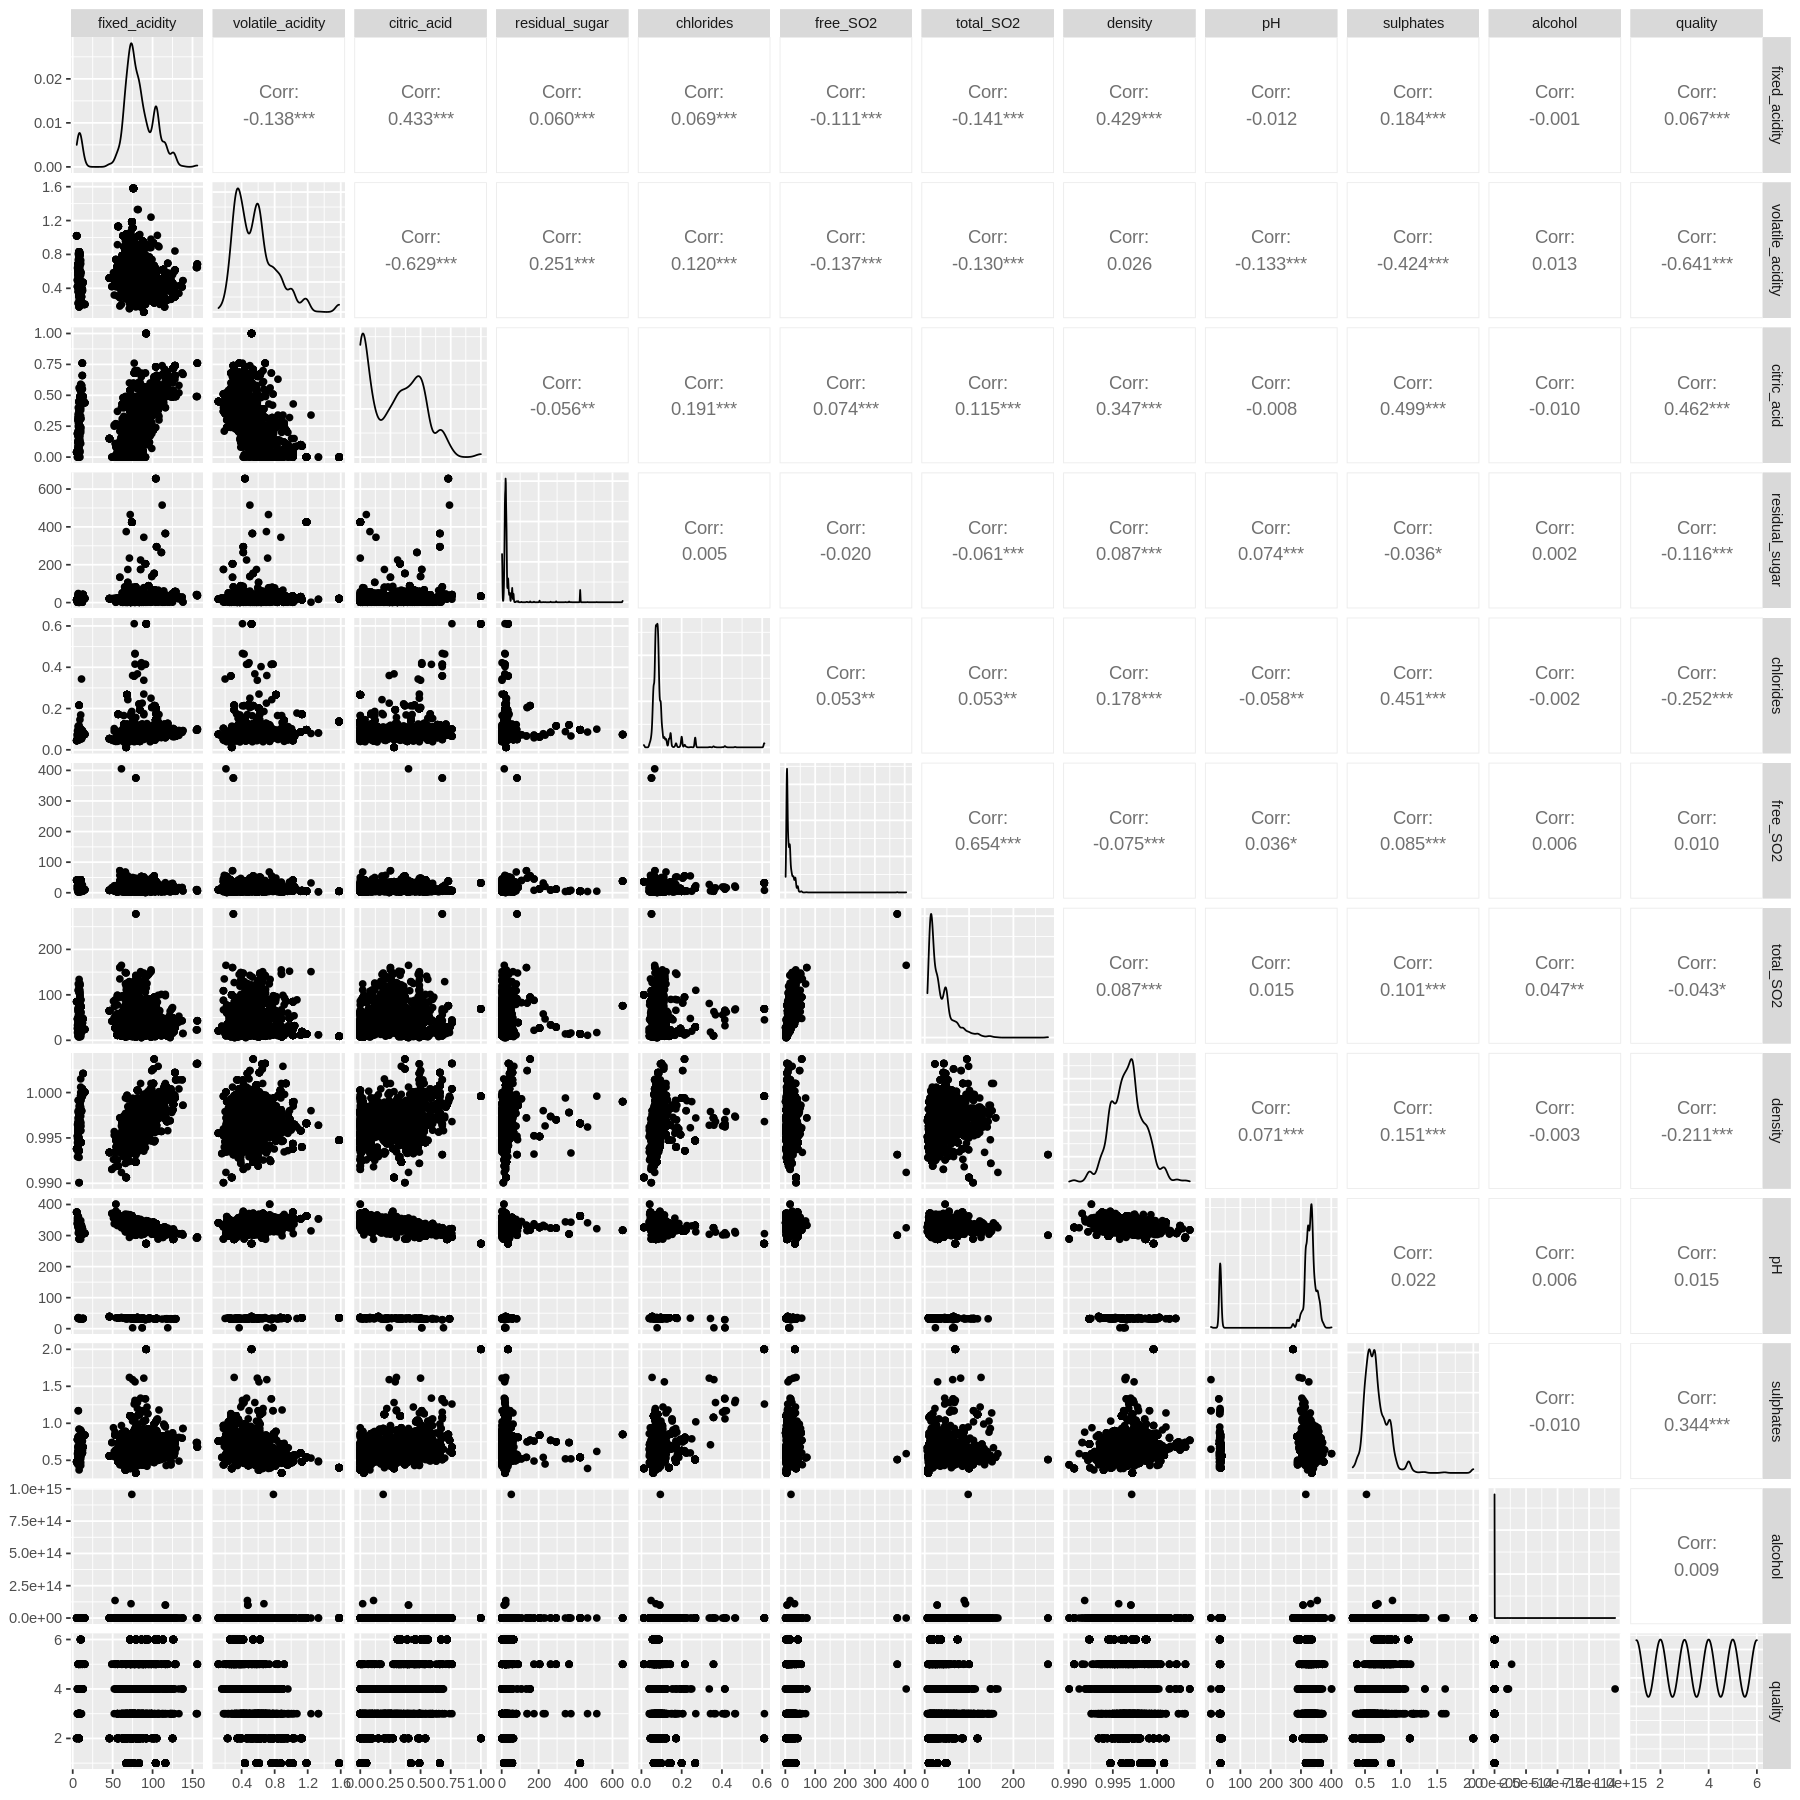

In [86]:
ggpairs(wine_training_corr) 

Using research, we expanded our potential predictor variable pool to include alcohol. In a multitude of ways, alcohol may correlate with quality as it is crucial for the fermentation process and palette. As it ferments, alcohol produces esters, which heavily impact aromas and the bitter flavour. Furthermore, the body and sweetness of the wine is in part, due to the quantity of alcohol. [1] 

Free sulfur dioxide was not considered for two main reasons. First, there was minimal correlation to taste and aroma, which plays an integral role in assigning wine quality. Free sulfur dioxide prevents microbial growth and oxidation of wine by inhibiting oxidation enzymes, impacting shelf life. [2] Secondly, total sulfur dioxide is the free sulfur dioxide and the chemically bound portions combined. [3] Using total sulfur dioxide as a predictor took into account the quantity of free sulfur dioxide.  [4]

Other variables, such as the residual sugar, pH, and fixed acidity factors were related to quality in a less clear and consistent way. If we had additional time and resources to explore these more intricate relationships, we would like to research deeper into these variables. They were not as manageable due to their nature; for example, in its simplest form, pH and fixed acidity would impact wine taste depending on their many different interactions with quantities of multiple other factors beyond the variables in this dataset. 

To explore and confirm how the chosen predictors affected wine quality, we plotted each predictor variable we were considering against quality and observed the trend. To do this, we utilized geom_boxplot from the ggplot2 package, shown in Figure 9. The advantage of using box plots in this exploration was how the distribution could be shown for each quality class. We observed that there was a non linear pattern among the means of each variable and the wine quality. Therefore, we would use the factors volatile acidity, citric acid, chlorides, alcohol and sulphates as predictor variables for our model. 


In [87]:
wine_training <- wine_training |>
                mutate(across(is.numeric, ~ as.numeric(scale(sulphates)))) 
           
                      
quality_sulphates <- ggplot(wine_training, aes(quality,sulphates)) +
                    geom_boxplot()+
                    ggtitle("Quality vs. Sulphates")+
                    theme(text=element_text(size=20))
                    


In [88]:
wine_training <- wine_training |>
                mutate(across(is.numeric, ~ as.numeric(scale(citric_acid)))) 
           
quality_citric_acid <- ggplot(wine_training, aes(quality, citric_acid))+
                       geom_boxplot()+
                    ggtitle("Quality vs. Citric Acid")+
                    theme(text=element_text(size=20))



In [89]:
wine_training <- wine_training |>
                mutate(across(is.numeric, ~ as.numeric(scale(volatile_acidity))))

quality_volatile_acidity <- ggplot(wine_training, aes(quality, volatile_acidity))+ 
                    geom_boxplot()+
                    ggtitle("Quality vs. Volatile Acidity")+
                    theme(text=element_text(size=20))





In [90]:
wine_training <- wine_training |>
                mutate(across(is.numeric, ~ as.numeric(scale(chlorides))))

quality_chlorides <- ggplot(wine_training, aes(quality, chlorides))+ 
                    geom_boxplot()+
                    ggtitle("Quality vs. Chlorides")+
                    theme(text=element_text(size=20))

In [100]:
wine_training <- wine_training |>
                mutate(across(is.numeric, ~ as.numeric(scale(alcohol))))

quality_alcohol <- ggplot(wine_training, aes(quality, alcohol))+ 
                    geom_boxplot()+
                    ggtitle("Quality vs. Alcohol")+
                    theme(text=element_text(size=20))

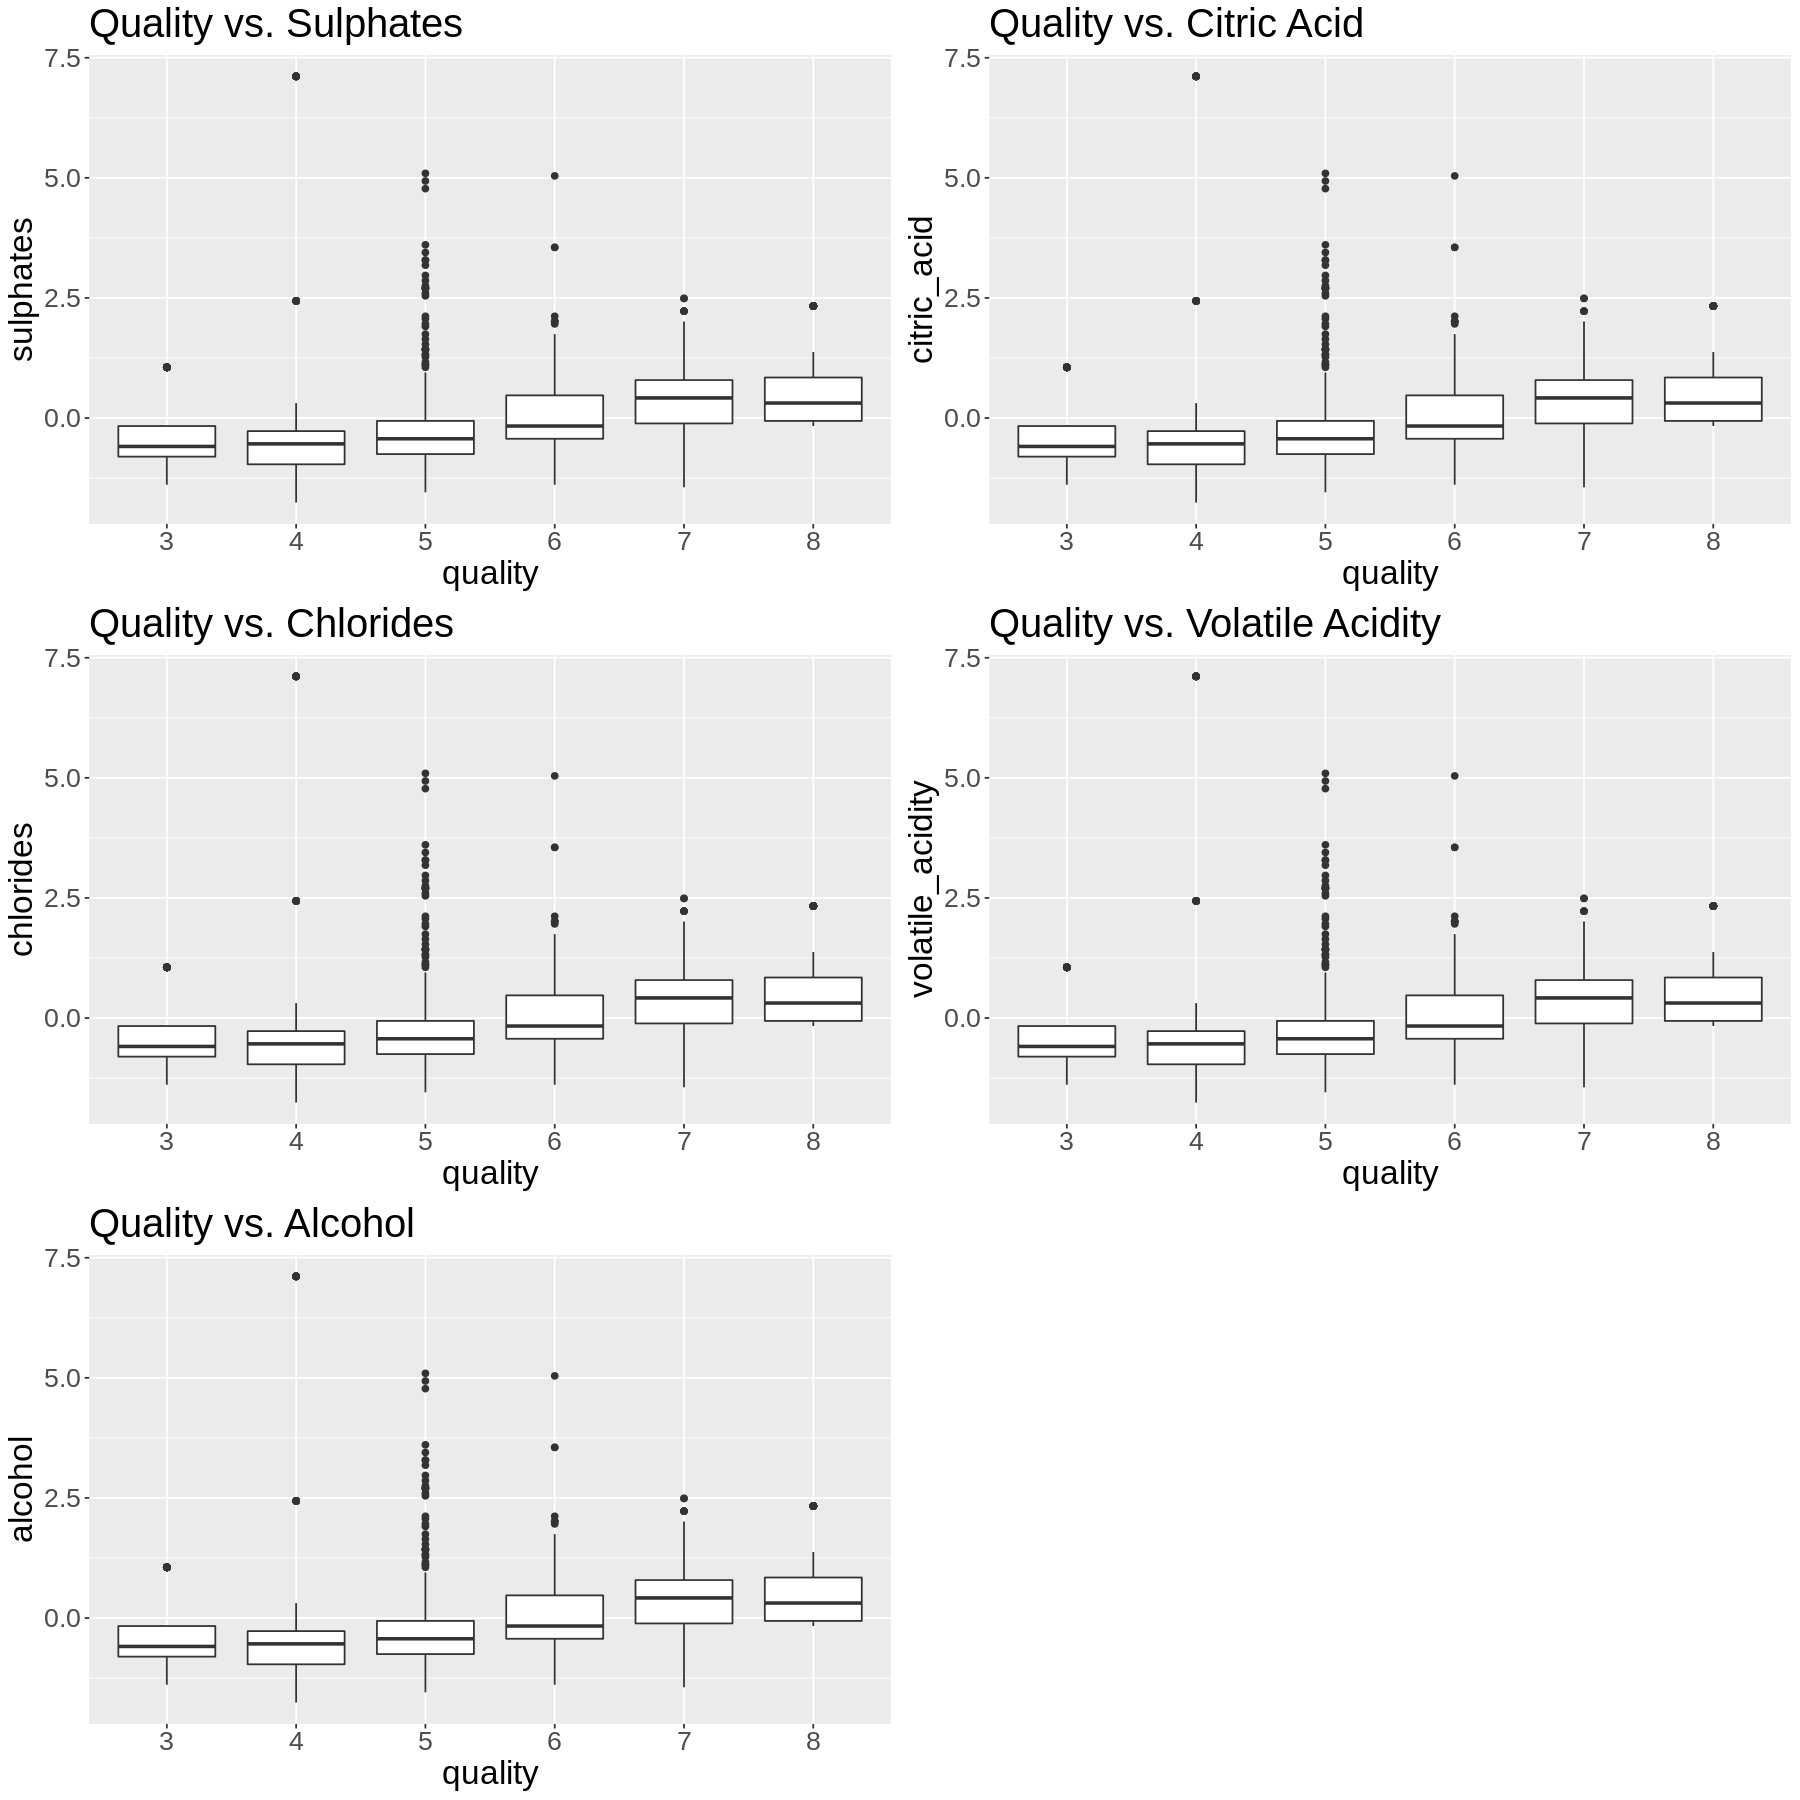

In [101]:
options(repr.plot.width = 15, repr.plot.height = 15)
quality_panel<- plot_grid(quality_sulphates, quality_citric_acid,
                                        quality_chlorides, quality_volatile_acidity, quality_alcohol,
                                        ncol = 2)

quality_panel

We used the K-nearest neighbour algorithm from the parsnip R package in tidymodels. Creating a model specification using nearest_neighbor, we used weight = “rectangular” so that each K nearest neighbour would get one “vote” in the classification process. We implemented the argument tune() so that each parameter of the model may be tuned. We used kknn and classification from the R package to train our model, using set_engine and set_mode. 

In our recipe function, we used step_scale and step_center for all predictors so that they each had a mean of 0 and a standard deviation of 1. This would prevent certain variables from impacting the predictions more than others. In the first line of our recipe function, we also specified the training dataset we were using and that our predictors were volatile acidity, citric acid, chlorides and sulphates.


In [103]:
set.seed(100)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn")|>
            set_mode("classification")



knn_recipe <- recipe(quality~sulphates + citric_acid + chlorides + volatile_acidity + alcohol, data = wine_training) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors())


To find the number of neighbours (k value) that would produce the highest accuracy for our model, we performed a 5-fold cross-validation with tidymodels on the scaled and centered training set. The function vfold_cv split our data in 5 folds automatically, with quality as the stratum. 

We made sure to use set.seed in order for the split to be replicable. Our data analysis workflow used tune_grid to fit the model for each value in the range of parameter values. Using the function tibble and passing it to the argument grid, we specified that we were looking for a k value between 0 and 100, with increments of 5. We decided on this range due to limitations of processing speed and computational power. 

The collect_metrics function aggregated the mean and standard error of the classifier’s validation accuracy. Using the filter function, we found the accuracy results under the .metric column. 

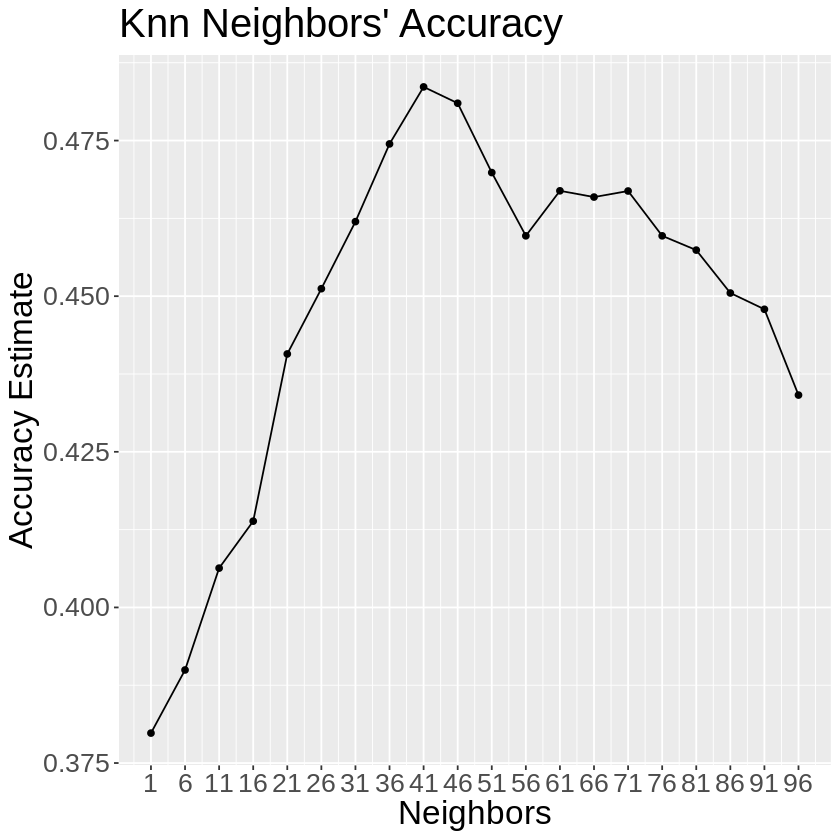

In [102]:
set.seed(100)

k_vals <- tibble(neighbors = seq(from= 1, to = 100, by = 5))

wine_vfold <- vfold_cv(wine_training, v = 5, strata = quality)

knn_results <- workflow() |>
                add_recipe(knn_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = wine_vfold, grid = k_vals) |>
                collect_metrics()

accuracies <- knn_results |> filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line()+
                 labs(x="Neighbors", y="Accuracy Estimate") + 
                 scale_x_continuous(breaks = seq(1, 100, by = 5)) + 
                ggtitle("Knn Neighbors' Accuracy")+
                theme(text=element_text(size=20))


options(repr.plot.width = 7, repr.plot.height = 7)
accuracy_vs_k

To visualize the results, the accuracies of the cross-validation were plotted against k values. According to the plot (Figure 10), the highest accuracy of our model would be achieved when k = 41, therefore 41 was used as our k value. 

### Final Fit & Prediction

In [20]:
set.seed(100)
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 46) |>
                  set_engine("kknn")|>
                  set_mode("classification")

# Using the same recipe as above, we build our classification model

wine_fit <- workflow() |>
            add_recipe(knn_recipe) |>
            add_model(knn_spec_final) |>
            fit(data = wine_training)

wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(46,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5085134
Best kernel: rectangular
Best k: 46

In [21]:
set.seed(100)
# Prediction
wine_predictions <- predict(wine_fit, wine_testing) |>
                    bind_cols(wine_testing) |> select(.pred_class, quality)
head(wine_predictions)

# Confusion Matrix
wine_metrics <- wine_predictions |>
                metrics(truth = quality, estimate = .pred_class)

wine_conf_mat <- wine_predictions |> 
                 conf_mat(truth = quality, estimate = .pred_class)
wine_conf_mat

.pred_class,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
8,74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,5
8,73,0.65,0.00,12,0.065,15,21,0.9946,339,0.47,10,7
7,75,0.50,0.36,61,0.071,17,102,0.9978,335,0.80,105,5
8,67,0.58,0.08,18,0.097,15,65,0.9959,328,0.54,92,5
7,85,0.28,0.56,18,0.092,35,103,0.9969,33,0.75,105,7


          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   0   0   0   0   0   0
         6   0   1   8   6   2   0
         7   0  10 130 120  43   5
         8   0   2  34  33   7   0

## Discussion

Considering our model accuracy was not high, our findings were that physicochemical factors alone are not enough to predict the preferences of the human taste and quality. It is possible that we simply do not understand taste enough to predict wine quality, as the relationship between taste and physicochemical properties have not been well established in the industry. The criteria of which wine tasting experts judge quality may vary, causing inconsistent assessments. Although quality classification is universal across the industry, the taste testers who assign quality are not identical, as taste is a subjective sense that cannot be universalized. 

Alternatively, our variables may not have had enough correlation with wine quality to build a model with a higher prediction accuracy. However, we find the likeliness of this to be lower as our predictors were chosen with analytical methods backed with scientific research.

The chlorides variable represented the amount of sodium chloride present in the wine, which controlled the saltiness of the flavor. Volatile acidity measured the fatty acids in wine and was responsible for the vinegar-like odour. Citric acid added a sour taste depending on its quantity, increasing acidity. Total sulphur dioxide served as a preservative and a chemically bound substance that impacted flavour and oxidation. Alcohol content was crucial for the chemical fermentation process that impacted the taste and aroma.

 Due to this, we expected physicochemical factors to be able to predict wine quality with a mediocre degree of accuracy, but our results contradicted these expectations.Our result of 52% accuracy demonstrated that there may be other confounding variables that existed outside the dataset we have used. 

The impact of these potential findings leads one to question if wine quality is determined in a universally consistent way. Based on our findings, taste plays a much more important role in its classification of quality than initially thought. Therefore, there likely exists quality inconsistencies across the industry. For the future, perhaps a new way of assessing wine would exist; a method that would be reproducible and less reliant on subjective senses. For example, dividing quality into 2 types: physicochemical and human tested could be an option.

In future studies, this could lead to questions like:
Are there objective or nearly objective ways to predict the wine quality assigned by a human expert?
Is there a way to create a more sophisticated model with higher prediction accuracy while still using physicochemical predictors?
How reliant is quality on taste assessments?
Is it possible to create a predictive model of quality using taste assessment scores?



### References

[1] Chen, W. (2016, September 9). What role does alcohol play in wine? Hemisphere Wine Guild. Retrieved December 7, 2022, from http://hemisphereswineclub.ca/role-alcohol-play-wine/ 

[2] Monro, T. M., Moore, R. L., Nguyen, M.-C., Ebendorff-Heidepriem, H., Skouroumounis, G. K., Elsey, G. M., & Taylor, D. K. (2012). Sensing free sulfur dioxide in wine. Sensors (Basel, Switzerland). Retrieved December 7, 2022, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3472855/ 

[3] Admin. (2018, February 27). Total sulfur dioxide – why it matters, too! Midwest Grape and Wine Industry Institute. Retrieved December 7, 2022, from https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/ 

[4] Practical measurement of total so in wine 2 - australian wine research ... (n.d.). Retrieved December 8, 2022, from https://www.awri.com.au/wp-content/uploads/2018/12/s2037.pdf 

[5] Author links open overlay panelRuiFragosoaEnvelopeAntónio A.C.VieiraabPersonEnvelope, RuiFragosoaEnvelope, a, A.C.VieiraabPersonEnvelope, A., b, Highlights•Use of data from enterprises of the wine sector to assess their efficiency.•Proposal of approach comprised of data envelopment and econometric analysis.•Results indicate 36% of the firms are efficient.•Discussion of the aspects defining the mos, & AbstractWine is an integral part of the economy and culture of many countries. Despite that. (2022, March 14). Efficiency analysis of the Portuguese wine industry using accounting and operational metrics. Results in Engineering. Retrieved December 7, 2022, from https://www.sciencedirect.com/science/article/pii/S2590123022000597#bib6 

[6] panelPauloCortezaPersonEnvelopeAntónioCerdeirabFernandoAlmeidabTelmoMatosbJoséReisab, A. links open overlay, PauloCortezaPersonEnvelope, a, AntónioCerdeirab, b, FernandoAlmeidab, TelmoMatosb, JoséReisab, AbstractWe propose a data mining approach to predict human wine taste preferences that is based on easily available analytical tests at the certification step. A large dataset (when compared to other studies in this domain) is considered, Wang, W., Shaw, M., Moreno, I., Kiang, M., Huang, Z., Ferrer, J., Asuncion, A., Bi, J., Bishop, C., Boser, B., … Fao. (2009, June 9). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems. Retrieved December 7, 2022, from https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub 

[7] Simon Woolf March 18, & Woolf, S. (2016, March 18). Sulfites in wine: Friend or foe? Decanter. Retrieved December 7, 2022, from https://www.decanter.com/learn/wine-terminology/sulfites-in-wine-friend-or-foe-295931/ 

[8]UCI Machine Learning Repository: Wine quality data set. (n.d.). Retrieved December 7, 2022, from https://archive.ics.uci.edu/ml/datasets/wine+quality 